<a href="https://colab.research.google.com/github/SrMouraSilva/Introducao-a-Modelagem/blob/main/3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()

In [ ]:
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 3.4

One method of evaluating the effectiveness of institutional trauma and burn medicine involves maximizing the function
$$
f(p_1, \cdots, p_n) =
\frac{\left(A-\sum_{i=1}^n p_i\right)}
{\sqrt{B+\sum_{i=1}^n p_i(1-p_i)}}
$$
over the set
$$S=\{(p_i, \cdots, p_n): a_i \leq p_i \leq b_i \text{ for all } i=1,\cdots,n\}.$$

Maximize f in the case $n=2, A=-5.92, B=1.58, a_1=0.01, b_1=0.33, a_2=0.75,$ and $b_2=0.85$ (Falk, J. et al., (1992)).

### Solução

Solucionemos este problema por meio dos cinco passos

#### Passo 1 - Variáveis

* $A, B$
* $n$
* $a_1, a_2, b_1, b_2$



#### Passo 1 - Suposições do problema

In [ ]:
n=2

p1, p2 = var('p_1 p_2', real=True)

A=-5.92
B=1.58
a_1=0.01
b_1=0.33
a_2=0.75
b_2=0.85

#### Passo 2 - Abordagem de modelagem

Problema de otimização multimensional cujo objetivo é maximizar $p_1$ e $p_2$. A solução se dará pelo método dos multiplicadores de Lagrange.



#### Passo 3 - Formulação do modelo

$$
\begin{align}
\text{max} ~~& f(p_1, p_2) \\
\text{sujeito a} ~~& t \in \Omega \\
\end{align}
$$

Sendo:
* $f(p_1, p_2)$: Função objetivo
* $\Omega$: Espaço viável das variáveis do problema.

Desta forma, temos:

$$
\begin{align}
\text{max} ~~& f(p_1, p_2) =
\frac{\left(A-\sum_{i=1}^{n=2} p_i\right)}
{\sqrt{B+\sum_{i=1}^{n=2} p_i(1-p_i)}} \\
\text{sujeito a} ~~ & a_1 \leq p_1 \leq b_1 \\
                    & a_2 \leq p_2 \leq b_2
\end{align}
$$

#### Passo 4 - Resolução do modelo

Função a ser otimizada sem restrição qualquer:

In [ ]:
f = (A - (p1 + p2))/sqrt(B + p1*(1-p1) + p2*(1-p2))


Math(f"f(p_1, p_2) = {latex(f)}")

<IPython.core.display.Math object>

Sua representação gráfica em 3d é apresentada abaixo. Note que restringimos o espaço de acordo com as restrições $a_1, a_2, b_1, b_2$.

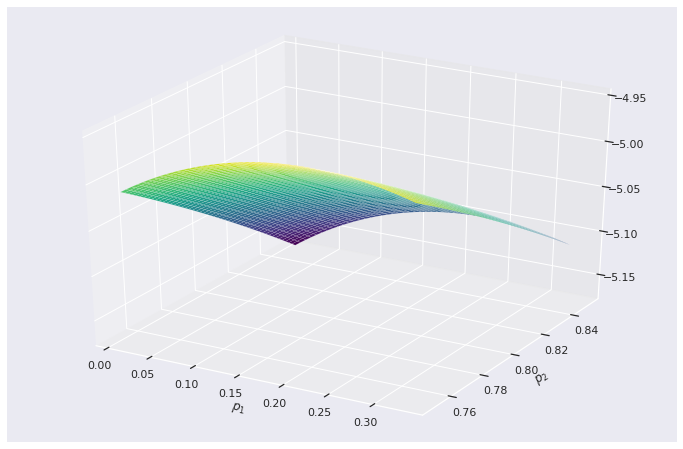

In [ ]:
plot3d(f, (p1, a_1, b_1), (p2, a_2, b_2), xlabel='$p_1$', ylabel='$p_2$')

Visualizemos agora o mesmo gráfico a partir de uma visão top-down.

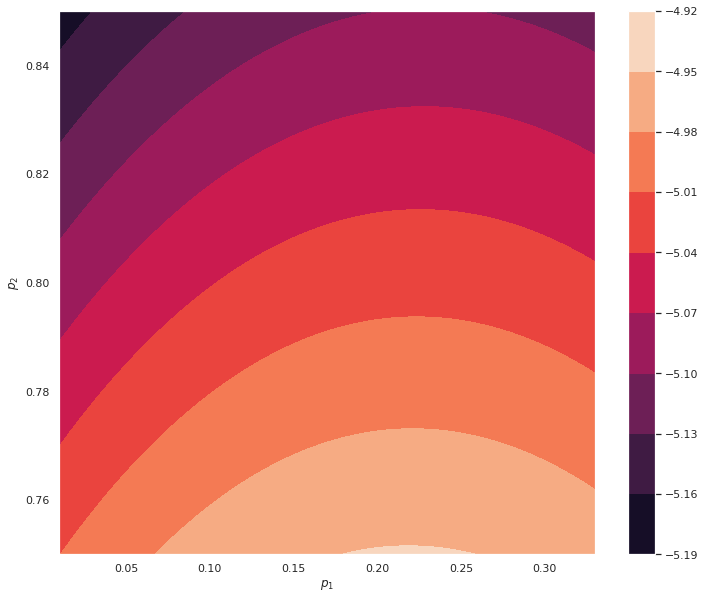

In [ ]:
#@title
def contour_plot(funcao, **kwargs):
    variables = list(kwargs.keys())
    if len(variables) != 2:
        raise Exception('Contour is for 2 dimentions')

    f = lambdify(variables, funcao, 'numpy')
    # PEP 0468: Python >= 3.6
    spaces = [np.linspace(*kwargs[e], 100) for e in variables]
    grid = np.meshgrid(*spaces)
    
    fig,ax=plt.subplots(1,1, figsize=(12, 10))
    
    c = plt.contourf(*grid, f(*grid))
    c.ax.set_xlabel(f"${variables[0]}$")
    c.ax.set_ylabel(f"${variables[1]}$")
    
    fig.colorbar(c)
    return c

contour_plot(f, p_1=(a_1, b_1), p_2=(a_2, b_2))

Podemos observar no gráfico acima que o ponto de máximo se dá quando $p_2=a_2$. Desta forma, limitaremos o problema a somente esta restrição.
 
As restrições de igualdade será:
\begin{align}
g_{a_2}(p_2, t_{a_2}) &= p_2 - a_2 = 0.
\end{align}
O problema, agora revisado, corresponde a 
$$
\begin{align}
\text{max} ~~& f(p_1, p_2) \\
\text{sujeito a} ~~ & g_{a_2}(p_2, t_{a_2})
\end{align}
$$

Seja a função Lagrangeana

In [ ]:
μ1, μ2, μ3, μ4 = symbols('\mu_1, \mu_2, \mu_3, \mu_4', real = True)
ta1, tb1, ta2, tb2 = symbols('t_{a_1}, t_{b_1}, t_{a_2}, t_{b_2}', real = True)

# Todas as 4 restrições
# L = f + μ1 * (p_1 - a_1 - ta1**2) + μ2 * (b_1 - p_1 - tb1**2) \
#       + μ3 * (p_2 - a_2 - ta2**2) + μ4 * (b_2 - p_2 - tb2**2)

# Considerado somente que p_2 = a_2
L = f + μ3 * (p_2 - a_2)

Math(f"""
\\begin{{aligned}}
L(p_1, p_2, \\mu_3)
 &= L(p_1, p_2) + \\mu_3 \cdot g_{{a_2}}(p_2, t_{{a_2}}) \\\\
 &= L(p_1, p_2) + \\mu_3 \cdot (p_2 - a_2) \\\\
 &= {latex(L)}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

A derivada da função Lagrangeana em função de cada variável $(p_1, p_2, \mu_3)$:

In [ ]:
dLdp1 = diff(L, p1)
dLdp2 = diff(L, p2)
dLdμ1 = diff(L, μ1)
dLdμ2 = diff(L, μ2)
dLdμ3 = diff(L, μ3)
dLdμ4 = diff(L, μ4)
dLdta1 = diff(L, ta1)
dLdta2 = diff(L, ta2)
dLdtb1 = diff(L, tb1)
dLdtb2 = diff(L, tb2)

#mus = '\mu_1, \mu_2, \mu_3, \mu_4'
mus = '\mu_3'
Math(f"""
\\begin{{aligned}}
\\frac{{dL(p_1, p_2, {mus})}}{{dp_1}} &= {latex(dLdp1)} \\\\
\\frac{{dL(p_1, p_2, {mus})}}{{dp_2}} &= {latex(dLdp2)} \\\\
%\\frac{{dL(p_1, p_2, {mus})}}{{d\mu_1}} &= {latex(dLdμ1)} \\\\
%\\frac{{dL(p_1, p_2, {mus})}}{{d\mu_2}} &= {latex(dLdμ2)} \\\\
\\frac{{dL(p_1, p_2, {mus})}}{{d\mu_3}} &= {latex(dLdμ3)} \\\\
%\\frac{{dL(p_1, p_2, {mus})}}{{d\mu_4}} &= {latex(dLdμ4)} \\\\
%\\frac{{dL(p_1, p_2, {mus})}}{{dt_{{a_1}}}} &= {latex(dLdta1)} \\\\
%\\frac{{dL(p_1, p_2, {mus})}}{{dt_{{a_2}}}} &= {latex(dLdta2)} \\\\
%\\frac{{dL(p_1, p_2, {mus})}}{{dt_{{b_1}}}} &= {latex(dLdtb1)} \\\\
%\\frac{{dL(p_1, p_2, {mus})}}{{dt_{{b_2}}}} &= {latex(dLdtb2)}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Para obter o(s) ponto(s) estacionário(s), igualemos as equações obtidas no passo anterior a zero e resolvamos as equações. O resultado será
<!-- Igualando todas as derivadas a zero e solucionando o sistema de equações, encontramos os seguintes conjuntos soluções: -->

In [ ]:
solucoes = solve([
    dLdp1, dLdp2,
    dLdμ1, dLdμ2, dLdμ3, dLdμ4, 
    dLdta1, dLdta2, dLdtb1, dLdtb2
], 
[
    p1, p2, μ1, μ2, μ3, μ4, ta1, ta2, tb1, tb2
], dict=True)

In [ ]:
for solucao in solucoes:
    display(Math(latex(solucao)))
    # display(Math(f"p_1={solucao[p1]}, p_2={solucao[p2]}"))
    # display(Math(latex(f"\mu_1={solucao[μ1]}, \mu_2={solucao[μ2]}, \mu_3={solucao[μ3]}, \mu_4={solucao[μ4]}")))
    # display(Math(f""))

<IPython.core.display.Math object>

Aplicando os valores obtidos na função, objetivo, teremos

In [ ]:
Math(f"""
L(p_1={solucoes[0][p_1]}, p_2={solucoes[0][p_2]:.3f}, \mu_3={solucoes[0][μ3]:.5f})
 = {L.subs(solucoes[0])}
""")

<IPython.core.display.Math object>

#### Passo 5 - Resposta da pergunta



O ponto que maximiza a função $f(p_1,p_2)$, respeitando as restrições do problema, corresponde a:

In [ ]:
Math(f"""
\\begin{{aligned}}
p_1 &={solucoes[0][p_1]} \\\\
p_2 &={solucoes[0][p_2]}
\\end{{aligned}}
""")

<IPython.core.display.Math object>

## Tentativa antiga com todas as restrições


Transformemos as restrições de desigualdade em restrições de igualdade. Podemos escrever a inequação $a_1 \leq p_1 \leq a_2$ de forma separada
\begin{align}
h_{a_1}(p_1) = p_1 - a_1 &\geq 0 \\
h_{b_1}(p_1) = b_1 - p_1 &\geq 0.
\end{align}
Para convertê-las em restrições de igualdade, introduzamos duas novas variáveis $t_{a_1}$ e $t_{b_1}$. As restrições de igualdade serão:
\begin{align}
g_{a_1}(p_1, t_{a_1}) &= p_1 - a_1 - t_{a_1}^2 = 0 \\
g_{b_1}(p_1, t_{b_1}) &= b_1 - p_1 - t_{b_1}^2 = 0.
\end{align}
De forma similar, para a outra restrição, teremos
\begin{align}
g_{a_2}(p_2, t_{a_2}) &= p_2 - a_2 - t_{a_2}^2 = 0 \\
g_{b_2}(p_2, t_{b_2}) &= b_2 - p_2 - t_{b_2}^2 = 0.
\end{align}

O problema, agora revisado, corresponde a 
$$
\begin{align}
\text{max} ~~& f(p_1, p_2) \\
\text{sujeito a} ~~ & g_{a_1}(p_1, t_{a_1}) \\
                    & g_{b_1}(p_1, t_{b_1}) \\
                    & g_{a_2}(p_2, t_{a_2}) \\
                    & g_{b_2}(p_2, t_{b_2})
\end{align}
$$

In [ ]:
grad_f = [diff(f, variavel) for variavel in (p1, p2)]
grad_f

[(p_1 - 1/2)*(-p_1 - p_2 - 5.92)/(p_1*(-p_1 + 1) + p_2*(-p_2 + 1) + 1.58)**(3/2) - 1/sqrt(p_1*(-p_1 + 1) + p_2*(-p_2 + 1) + 1.58),
 (p_2 - 1/2)*(-p_1 - p_2 - 5.92)/(p_1*(-p_1 + 1) + p_2*(-p_2 + 1) + 1.58)**(3/2) - 1/sqrt(p_1*(-p_1 + 1) + p_2*(-p_2 + 1) + 1.58)]

In [ ]:
import numpy as np
ta1, tb1, ta2, tb2 = symbols('t_{a_1}, t_{b_1}, t_{a_2}, t_{b_2}', real = True)

gs = [
    p_1 - a_1 - ta1**2, 
    b_1 - p_1 - tb1**2, 
    p_2 - a_2 - ta2**2,
    b_2 - p_2 - tb2**2
]

grads_g = [
    np.array([diff(g, variavel) for variavel in (p1, p2)])
    for g in gs
]

grads_g

[array([1, 0], dtype=object),
 array([-1, 0], dtype=object),
 array([0, 1], dtype=object),
 array([0, -1], dtype=object)]

In [ ]:
lambdas = [var(f'\lambda_{l+1}', real=True) for l, _ in enumerate(grads_g)]

grads_g_lambdas = [g*l for g, l in zip(grads_g, lambdas)]

sum_grads_g_lambdas = [sum(grads) for grads in zip(*grads_g_lambdas)]

equacoes = [Eq(df, dg) for df, dg in zip(grad_f, sum_grads_g_lambdas)]
Math(latex(equacoes))

<IPython.core.display.Math object>

In [ ]:
Math(latex(solve(equacoes + gs)))

<IPython.core.display.Math object>